In [65]:
# Importing Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_regression
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [66]:
# Reading the file with pandas

stroke_df = pd.read_csv(('Resources/postgres.csv'))
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4903,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4904,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4905,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4906,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<AxesSubplot:>

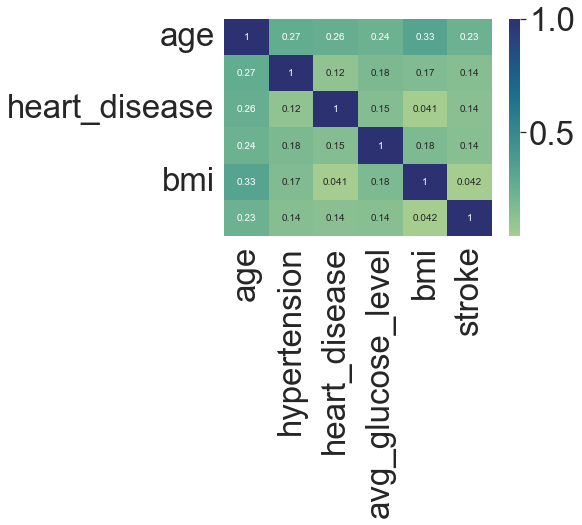

In [67]:
# correlation between features and target coloumn

sns.heatmap(stroke_df.corr(), annot = True, cmap = 'crest')

In [68]:
# changing dataset values to numerics

stroke_df_dummies = pd.get_dummies(stroke_df)
stroke_df_dummies

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,105.92,32.5,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,174.12,24.0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,13.0,0,0,103.08,18.6,0,1,0,1,0,...,0,0,0,1,1,0,1,0,0,0
4904,81.0,0,0,125.20,40.0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
4905,35.0,0,0,82.99,30.6,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4906,51.0,0,0,166.29,25.6,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0


In [69]:
# Split our preprocessed data into our features and target arrays
X= stroke_df_dummies.drop(columns=["stroke"])
y = stroke_df_dummies['stroke']

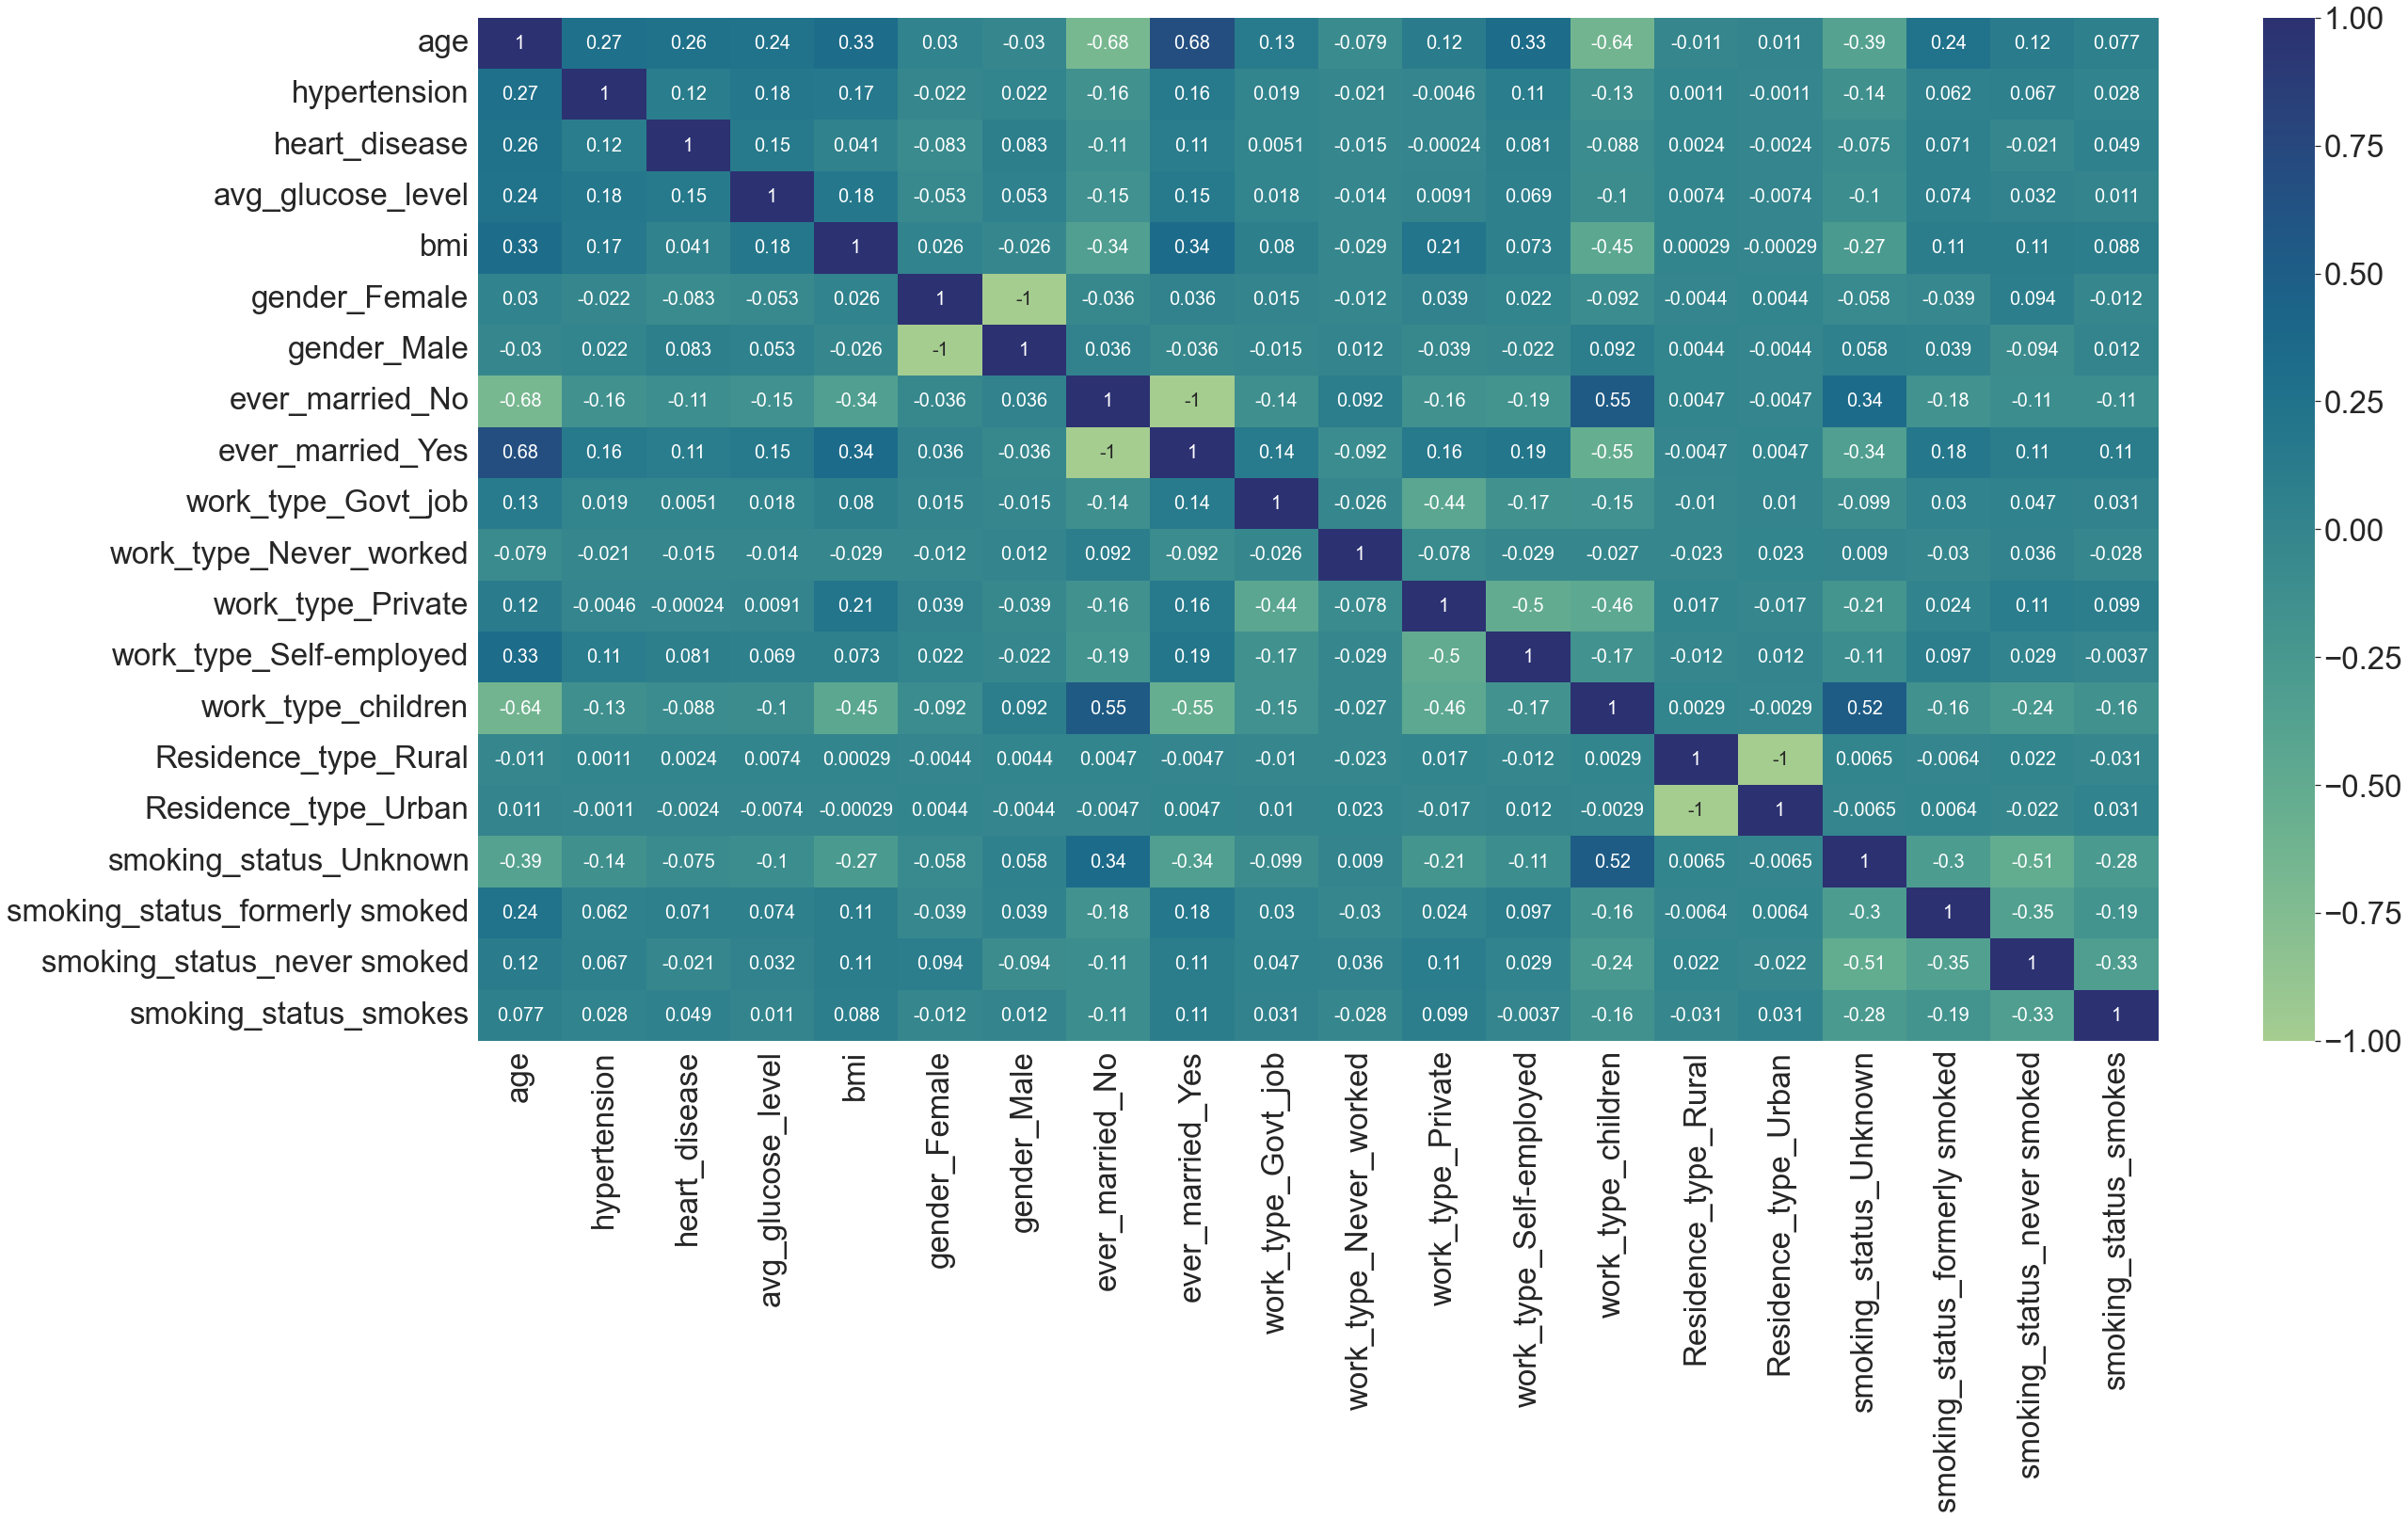

In [70]:
plt.figure(figsize=(40, 20))
sns.heatmap(X.corr(), annot = True, cmap = 'crest', annot_kws={"size": 20})
sns.set(font_scale=3)

In [71]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
744,31.0,0,0,103.55,20.5,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0
1448,66.0,0,1,76.11,37.0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0
4840,46.0,0,0,64.09,25.3,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0
1965,41.0,1,0,107.50,54.0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0
2960,61.0,0,0,115.42,16.7,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,78.0,0,0,61.38,24.3,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0
466,51.0,0,0,82.93,29.7,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
3092,35.0,1,0,94.20,34.4,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3772,61.0,0,0,116.78,39.8,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0


In [72]:
X_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4664,32.00,0,0,102.13,32.3,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3542,42.00,0,0,84.03,31.4,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0
907,66.00,1,0,74.90,32.1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2833,21.00,0,0,71.06,25.3,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
3106,47.00,0,0,88.49,22.2,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,0.32,0,0,73.71,16.2,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0
4272,3.00,0,0,110.20,21.8,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0
32,58.00,0,0,92.62,32.0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0
2837,33.00,0,0,114.16,43.3,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0


In [73]:
y_train

744     0
1448    0
4840    0
1965    0
2960    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: stroke, Length: 3681, dtype: int64

In [74]:
np.bincount(y_train)

array([3535,  146])

In [75]:
y_test

4664    0
3542    0
907     0
2833    0
3106    0
       ..
518     0
4272    0
32      1
2837    0
1157    0
Name: stroke, Length: 1227, dtype: int64

In [76]:
# Check the number of occurrences per target value in the training data
unique_elements_train, counts_elements_train = np.unique(y_train, return_counts=True)
print("Frequency of unique values of the `y_train` array:")
print(np.asarray((unique_elements_train, counts_elements_train)))

Frequency of unique values of the `y_train` array:
[[   0    1]
 [3535  146]]


In [77]:
# Check the number of occurrences per target value in the testing data
unique_elements_test, counts_elements_test = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the `y_test` array:")
print(np.asarray((unique_elements_test, counts_elements_test)))

Frequency of unique values of the `y_test` array:
[[   0    1]
 [1164   63]]


# K-nearest neighbors

k: 1, Train/Test Score: 1.000/0.918
k: 3, Train/Test Score: 0.963/0.942
k: 5, Train/Test Score: 0.960/0.948
k: 7, Train/Test Score: 0.961/0.948
k: 9, Train/Test Score: 0.960/0.949
k: 11, Train/Test Score: 0.960/0.949
k: 13, Train/Test Score: 0.960/0.949
k: 15, Train/Test Score: 0.960/0.949
k: 17, Train/Test Score: 0.960/0.949
k: 19, Train/Test Score: 0.960/0.949


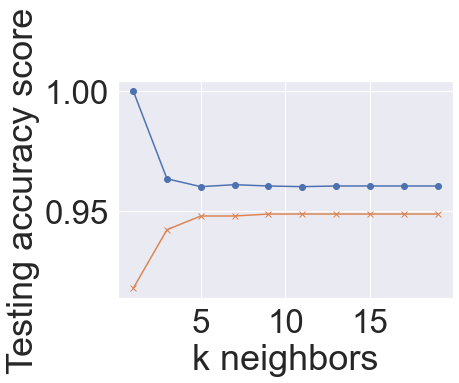

In [78]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [79]:
# Create the KNN model. Note that k:5 provides the best accuracy 
knn_model = KNeighborsClassifier(n_neighbors=5)

In [80]:
# Train the KNN model
knn_model.fit(X_train_scaled, y_train)
print("k=5 Test Acc: %.3f" % knn_model.score(X_test_scaled, y_test))

k=5 Test Acc: 0.948


In [81]:
# Show the confussion matrix for the KNN model
from sklearn.metrics import confusion_matrix

y_pred_knn = knn_model.predict(X_test_scaled)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[1162    2]
 [  62    1]]


In [82]:
# Print classification report for the KNN model
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1164
           1       0.33      0.02      0.03        63

    accuracy                           0.95      1227
   macro avg       0.64      0.51      0.50      1227
weighted avg       0.92      0.95      0.92      1227



In [83]:
knn_model.predict(X_test_scaled[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [84]:
# Note that each pair always adds up to exactly 1
knn_model.predict_proba(X_test_scaled[0:10])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [85]:
knn_model.predict_proba(X_test_scaled[0:10])[:,1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Using KNN to Create the ROC Curve

In [86]:
# Import the roc_curve module from scikit-learn
from sklearn.metrics import roc_curve

In [87]:
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)

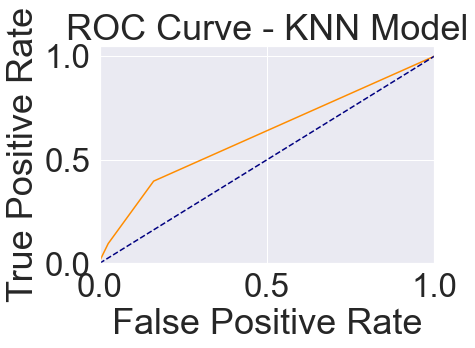

In [88]:
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Model')
plt.show()

In [89]:
# Import the auc module from scikit-learn
from sklearn.metrics import auc

In [90]:
# Compute the AUC for the KNN model
roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC for the KNN Model: {roc_auc_knn}")

AUC for the KNN Model: 0.6203567337587956


# Logistic Regression

In [91]:
# Train a Logistic Regression model 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/Users/ruchisharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
# print the model score
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9606085302906818
Testing Data Score: 0.9486552567237164


In [93]:
# Making prediction
print(f'Actual:\t\t{list(y_test[:20])}')
print(f'Predicted:\t{list(classifier.predict(X_test[:20]))}')

Actual:		[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Predicted:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


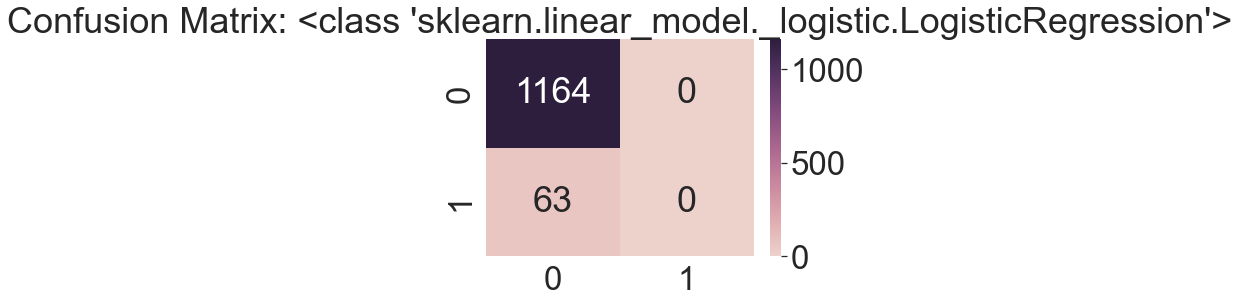

In [94]:
# generating confusion matrix

cf_matrix = confusion_matrix(y_test, classifier.predict(X_test))
plt.title('Confusion Matrix: {}'.format(LogisticRegression))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.show()

In [31]:
from sklearn.metrics import classification_report, confusion_matrix



In [32]:
TP = 0
FP = 0
TN = 1164
FN = 63
accuracy = (TP + TN) / (TP + FP + TN + FN)
print(accuracy)

0.9486552567237164


In [33]:
y_true = y_test
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'Training Score: {classifier.score(X_train_scaled, y_train)}')
print(f'Testing Score: {classifier.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1164
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1227
   macro avg       0.47      0.50      0.49      1227
weighted avg       0.90      0.95      0.92      1227

Training Score: 0.9540885628905189
Testing Score: 0.9462102689486552


/Users/ruchisharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ruchisharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ruchisharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/

In [34]:
# Get the probability for each class in the model
y_pred_proba_lr = classifier.predict_proba(X_test_scaled)[:,1]

/Users/ruchisharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Creating the ROC Curve

In [35]:
# Get the ROC curve data for the logistic regression model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)

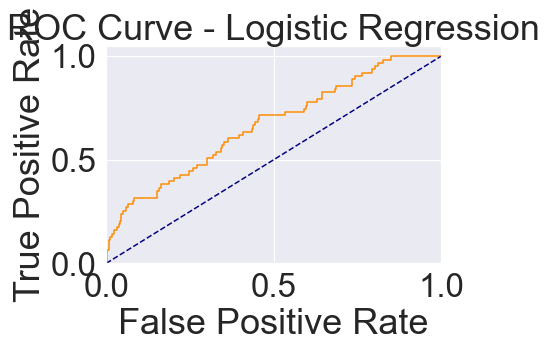

In [36]:
plt.figure()
plt.plot(fpr_lr, tpr_lr, color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.show()

In [38]:
# Compute AUC for the logistic regression model
roc_auc_lr = auc(fpr_lr, tpr_lr)
print(f"AUC for the Logistic Regression Model: {roc_auc_lr}")

AUC for the Logistic Regression Model: 0.6668030327824143
